#### link dataset: https://www.kaggle.com/gpreda/covid-world-vaccination-progress

In [98]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import numpy as np

In [13]:
data = pd.read_csv('country_vaccinations.csv')
data.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [16]:
data['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fal

In [60]:
romania_statistics = data.loc[data['country'] == 'Romania']
ro_total_vacc = romania_statistics.loc[romania_statistics['total_vaccinations'].isna() == False]

In [62]:
ro_total_vacc.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
22936,Romania,ROU,2020-12-27,965.0,965.0,NaN,NaN,NaN,0.01,0.01,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Government of Romania via datelazi.ro,https://datelazi.ro/
22937,Romania,ROU,2020-12-28,2066.0,2066.0,NaN,1101.0,1101.0,0.01,0.01,NaN,57.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Government of Romania via datelazi.ro,https://datelazi.ro/
22938,Romania,ROU,2020-12-29,2778.0,2778.0,NaN,712.0,906.0,0.01,0.01,NaN,47.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Government of Romania via datelazi.ro,https://datelazi.ro/


In [69]:
monthList = []
dates = ro_total_vacc['date'].to_numpy() 
for date in dates:
    roi = date.split('-')
    month = roi[0]+"-"+roi[1]
    monthList.append(month)

In [70]:
ro_total_vacc['month'] = monthList

<ipython-input-70-7f0df0ae4093>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ro_total_vacc['month'] = monthList


In [73]:
groupByMonth = ro_total_vacc.groupby(by = 'month').sum()
groupByMonth

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
month,,,,,,,,,
2020-12,21764.0,21764.0,0.0,9324.0,5905.0,0.11,0.11,0.00,306.0
2021-01,8318774.0,7762758.0,556016.0,681126.0,598078.0,43.23,40.34,2.89,31085.0
2021-02,31883767.0,20483694.0,11400073.0,841457.0,879687.0,165.72,106.47,59.27,45730.0
2021-03,70849644.0,47047173.0,23802471.0,1555420.0,1434068.0,368.28,244.53,123.72,74544.0
2021-04,123008861.0,77092897.0,45915964.0,2152160.0,2083075.0,639.40,400.75,238.68,108281.0
2021-05,206156291.0,120058879.0,87356719.0,2633071.0,2668613.0,1071.62,624.09,454.09,138719.0
2021-06,238901672.0,127586622.0,117402559.0,1036295.0,1181463.0,1241.85,663.20,610.27,61415.0
2021-07,36092555.0,18976646.0,18424920.0,47099.0,67105.0,187.61,98.64,95.78,3488.0


#### People fully vaccinated by month in Romania

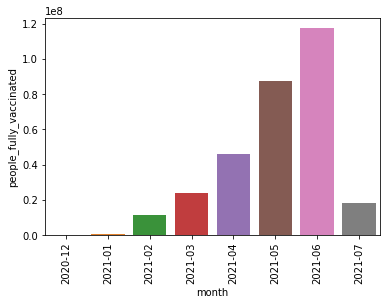

In [79]:
seaborn.barplot(data = groupByMonth, y = 'people_fully_vaccinated', x = groupByMonth.index )
plt.xticks(rotation = 90)
plt.show()

In [87]:
data_people_fully_vaccinated = data.dropna(axis = 0, subset = ['people_fully_vaccinated'])

In [88]:
data_people_fully_vaccinated['people_fully_vaccinated'].isna().sum()

0

In [89]:
data_people_fully_vaccinated['date'].isna().sum()

0

In [91]:
monthList = []
dates = data_people_fully_vaccinated['date'].to_numpy() 
for date in dates:
    roi = date.split('-')
    month = roi[0]+"-"+roi[1]
    monthList.append(month)

In [92]:
data_people_fully_vaccinated['month'] = monthList

<ipython-input-92-7c308ea83997>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_people_fully_vaccinated['month'] = monthList


In [99]:
unique, counts = np.unique(monthList, return_counts=True)
dict(zip(unique, counts))

{'2020-12': 36,
 '2021-01': 695,
 '2021-02': 1277,
 '2021-03': 1892,
 '2021-04': 2366,
 '2021-05': 2869,
 '2021-06': 3093,
 '2021-07': 1415}

In [102]:
data_groupedby_month = data_people_fully_vaccinated.groupby('month').sum()
data_groupedby_month

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
month,,,,,,,,,
2020-12,4.943086e+06,4.940012e+06,2.387700e+04,537645.0,341383.0,32.22,32.21,0.03,23049.0
2021-01,8.602537e+08,7.542909e+08,1.045495e+08,46798760.0,43909413.0,2939.41,2560.47,379.75,1423721.0
2021-02,3.720705e+09,2.929378e+09,7.777437e+08,112623786.0,110766202.0,14665.57,10910.73,3751.58,4263791.0
2021-03,1.008321e+10,7.452296e+09,2.648501e+09,247987920.0,240559960.0,35012.50,24757.21,10253.74,6929702.0
2021-04,1.934172e+10,1.377986e+10,5.743121e+09,348930947.0,345991016.0,62946.08,43619.22,19472.93,10377837.0
2021-05,3.103031e+10,2.080672e+10,1.056832e+10,343950635.0,364976935.0,107869.22,70784.44,37627.33,14604277.0
2021-06,4.482790e+10,2.991724e+10,1.573077e+10,515852796.0,512953513.0,148797.89,93835.11,59242.31,16048124.0
2021-07,2.518404e+10,1.648835e+10,8.965241e+09,231296201.0,243721610.0,84907.82,51558.44,35362.65,7418473.0


#### People fully vaccinated by month in the whole world

<AxesSubplot:xlabel='month', ylabel='people_fully_vaccinated'>

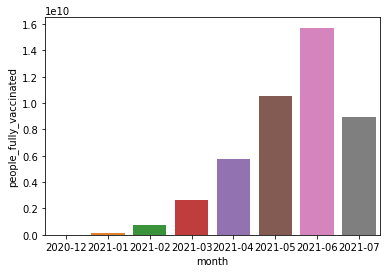

In [103]:
seaborn.barplot(data = data_groupedby_month, y = 'people_fully_vaccinated', x = data_groupedby_month.index  )

In [105]:
data_countries = data.groupby('country').sum()
data_countries

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
country,,,,,,,,,
Afghanistan,12716525.0,10093624.0,2368962.0,6874.0,978002.0,32.68,25.95,6.09,25140.0
Albania,56816656.0,25845822.0,16724617.0,755120.0,1025973.0,1974.29,898.10,581.15,356500.0
Algeria,2575030.0,2575030.0,0.0,30.0,2437370.0,5.87,5.87,0.00,55592.0
Andorra,509460.0,329482.0,118520.0,4802.0,65781.0,659.36,426.44,153.42,851369.0
Angola,16412310.0,11683758.0,4728552.0,0.0,1541670.0,49.94,35.56,14.39,46917.0
...,...,...,...,...,...,...,...,...,...
Wales,392127199.0,269950847.0,122176352.0,4027203.0,4094130.0,12437.14,8562.00,3875.06,1298540.0
Wallis and Futuna,111404.0,69293.0,42111.0,0.0,8576.0,990.60,616.17,374.44,762578.0
Yemen,1593637.0,1585060.0,8577.0,0.0,285946.0,5.34,5.31,0.03,9579.0


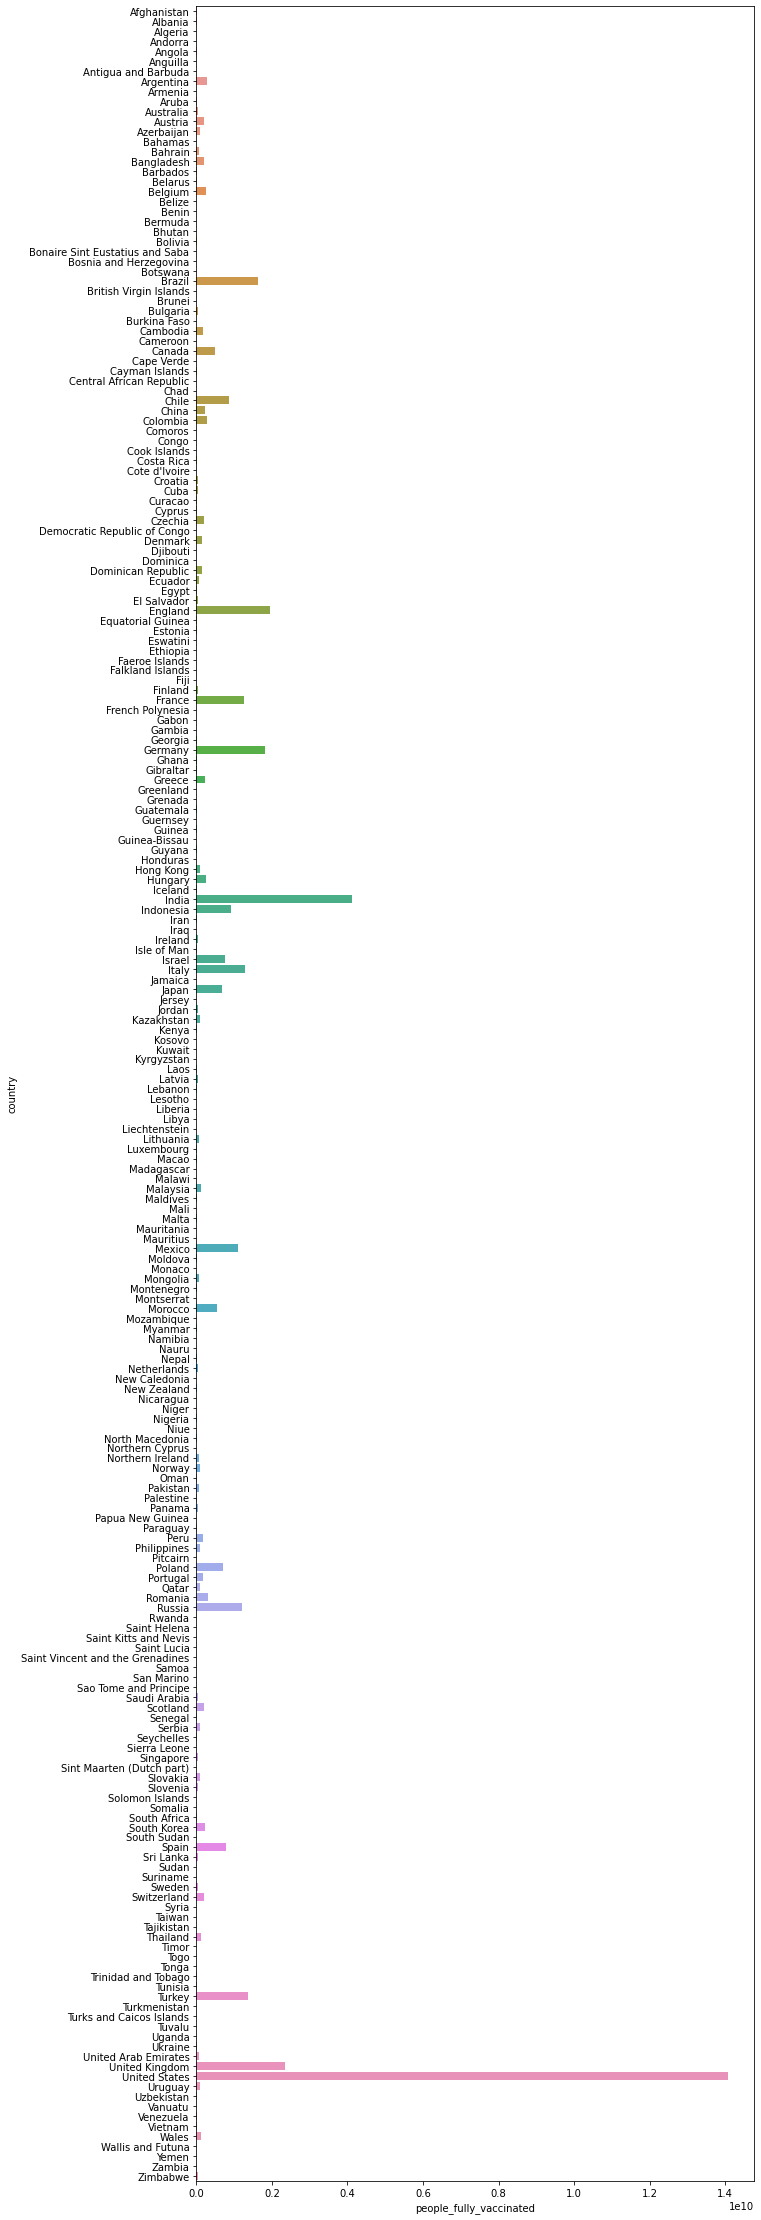

In [134]:
plt.figure(figsize=(10, 40))
seaborn.barplot(data = data_countries, y = data_countries.index, x = 'people_fully_vaccinated' )
# plt.xticks(rotation = 90)
plt.show()